# Parameter Estimation in Markov Networks

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Hey_Machine_Learning_Logo.png" width="400px" height="400px" />

> In the last session we saw how to estimate the parameters of a Bayesian Network. In particular, we saw that the maximum likelihood estimator can be calculated in closed form, simply as the frequentist interpretation of probability.
>
> In this session we will see how to estimate the parameters of a Markov Network. We will see that tha partition function will make it difficult to obtain a closed form solution of the optimal parameters, and then, we will have to use numerical methods to find them.
>
> Additionally, we will examine the MAP estimation of the parameters and its relation with including regularization terms in the optimization.

> **Objetives:**
> - To study the maximum likelihood parameter estimation problem for Markov Networks.
> - To study the maximum a posteriori parameter estimation problem for Markov Networks.

> **References:**
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Ch. 20.
> - Mastering Probabilistic Graphical Models Using Python, By Ankur Ankan and Abinash Panda. Ch. 6.
> - Probabilistic Graphical Models Specialization, offered through Coursera. Prof. Daphne Koller.


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/d/d5/Hey_Machine_Learning_Logo.png.</p>

___

## 1. Maximum likelihood parameter estimation in log-linear models

### 1.1. Log-likelihood function: lack of separability

A key property of the (log-)likelihood function for BNs was that it can be decomposed as the (sum) product of local likelihoods. Then, to maximize the whole function, one could maximize each local function separately.

We will see that this principle does not hold for MNs because of the partition function $Z$.

**Example:**

Consider the pairwise MN

In [1]:
from IPython.display import Image

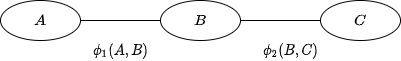

In [2]:
Image("figures/pairwiseMN.png")

Assume, for instance, that we know:

|  $A$  |  $B$  |  $\phi_1$  |
| ----- | ----- | ---------- |
| $a^0$ | $b^0$ |  $1$       |
| $a^0$ | $b^1$ |  $1$       |
| $a^1$ | $b^0$ |  $1$       |
| $a^1$ | $b^1$ | $\theta_1$ |

|  $B$  |  $C$  |  $\phi_1$  |
| ----- | ----- | ---------- |
| $b^0$ | $c^0$ |  $1$       |
| $b^0$ | $c^1$ | $\theta_2$ |
| $b^1$ | $c^0$ |  $1$       |
| $b^1$ | $c^1$ |  $1$       |

We want to estimate $\bar{\theta} = [\theta_1, \theta_2]$ with the IID data

$$\mathcal{D}=\{(a[1], b[1], c[1]), \dots, (a[M], b[M], c[M])\}.$$

We know that 

$$P_{\Phi}(A,B,C) = \frac{1}{Z} \phi_1(A,B) \phi_2(B,C),$$

with $Z = \sum_{A,B,C} \phi_1(A,B) \phi_2(B,C)$.

Thus, the log-likelihood function is (<font color=red> See in the whiteboard</font>):

$$l(\bar{\theta}: \mathcal{D}) =  \sum_{d=1}^{M} \left(\log \phi_1(a[d], b[d]) + \log \phi_2(b[d], c[d]) - \log Z(\bar{\theta})\right),$$

with $Z(\bar{\theta}) = 4 + 2\theta_1 + 2 \theta_2.$

Assuming that $M(a^1, b^1)$ and $M(b^0, c^1)$ are the number of times that the joint assignments $a^1, b^1$ and $b^0, c^1$ appear in $\mathcal{D}$, respectively, we have:

$$l(\bar{\theta}: \mathcal{D}) = M(a^1, b^1) \log \theta_1 + M(b^0, c^1) \log \theta_2 - M \log(4 + 2\theta_1 + 2 \theta_2).$$

The partition function $Z(\bar{\theta}) =% 4 + 2\theta_1 + 2 \theta_2$ **couples the parameters**:
- It is not possible to decompose the likelihood.
- We cannot obtain a closed form estimation for the parameters.

### 1.2. Log-likelihood for log-linear models

Recall that the log-linear models are a general representation. Given a set of features $\mathcal{F}=\{f_i(\bar{D}_i)\}_{i=1}^{k}$, where $f_i(\bar{D}_i)$ is a feature function defined over the variables $\bar{D}_i$, we have that the joint distribution for the log-linear model is:

$$P(X_1,\dots,X_n:\bar{\theta}) = \frac{1}{Z(\bar{\theta})} \exp\left\{ \sum_{i=1}^{k}\theta_i f_i (\bar{D}_i)\right\}.$$

The log-likelihood function is:

\begin{align}
l(\bar{\theta}:\mathcal{D}) & = \sum_{d=1}^{M}\left(\sum_{i=1}^{k}\theta_i f_i (\bar{x}[d]) - \log Z(\bar{\theta})\right) \\
                            & = \sum_{i=1}^{k}\theta_i \sum_{d=1}^{M} f_i (\bar{x}[d]) - M\log Z(\bar{\theta}),
\end{align}

where

$$\log Z(\bar{\theta}) = \log \left(\sum_{\bar{X}}\exp\left\{ \sum_{i=1}^{k}\theta_i f_i (\bar{D}_i)\right\}\right)$$

Before continuing, let's prove the following results (<font color=red>in the whiteboard</font>):

$$\frac{\partial}{\partial \theta_i} \log Z(\bar{\theta})= E_{\theta}[f_i]$$

$$\frac{\partial^2}{\partial \theta_i \partial \theta_j} \log Z(\bar{\theta})= \mathrm{cov}_{\theta}[f_i,f_j]$$

Hence the Hessian (second derivatives' matrix) of log-partition function $\log Z(\bar{\theta})$ is:

$$\frac{\partial^2}{\partial \theta_i \partial \theta_j} \log Z(\bar{\theta})= \mathrm{cov}_{\theta}[f_i,f_j]$$

the covariance matrix of the features - **semi-positive definite**. In this sense the log-partition is:

1. Concave

2. **Convex**

3. None of the above

Then, $-M \log Z(\bar{\theta})$ is concave.

On the other hand, the function $\sum_{i=1}^{k}\theta_i \sum_{d=1}^{M} f_i (\bar{x}[d])$ is linear.

Thus, the log-likelihood function is concave:

- No local maxima.
- Good theoretical guarantees

#### Maximum likelihood estimation

Given the above, we can divide the log-likelihood by the number of samples $M$ and the resulting function would still be concave:

\begin{align}
\frac{1}{M} l(\bar{\theta}:\mathcal{D}) & = \sum_{i=1}^{k}\theta_i \frac{1}{M}\sum_{d=1}^{M} f_i (\bar{x}[d]) - \log Z(\bar{\theta}) \\
                                        & = \sum_{i=1}^{k}\theta_i E_{\mathcal{D}}[f_i] - \log Z(\bar{\theta})
\end{align}

where $E_{\mathcal{D}}[f_i] = \frac{1}{M}\sum_{d=1}^{M} f_i (\bar{x}[d])$ is the empirical expectation of the feature $f_i$ in the data $\mathcal{D}$.

Thus, the gradient of the log-likelihood by the number of samples $M$ is:

$$\frac{\partial}{\partial \theta_i} \frac{1}{M} l(\bar{\theta}:\mathcal{D}) = E_{\mathcal{D}}[f_i] - E_{\theta}[f_i]$$

> *Theorem*. Given a set of features $\mathcal{F}$, $\hat{\theta}$ is the MLE if and only if
>
> $$E_{\mathcal{D}}[f_i] = E_{\hat{\theta}}[f_i]$$
>
> for all $i$.

Then, **how do we compute the MLE parameters?**

We can use numerical methods. In particular, the first order gradient ascent will do the job

$$\frac{\partial}{\partial \theta_i} \frac{1}{M} l(\bar{\theta}:\mathcal{D}) = E_{\mathcal{D}}[f_i] - E_{\theta}[f_i].$$

For the gradient, we need the expectations of the features:

- In data.
- Relative to current model: in this step we need to perform inference at each gradient step.

Unfortunately, `pgmpy` MarkovModel object do not have method fit. We'll do it ourselves to illustrate the above.

**Example:** See in the whiteboard the log-linear model of A-B.

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [2]:
# Import scipy.optimize.fmin_cg
from scipy.optimize import fmin_cg

In [3]:
# Generate some random data for A - B
M = 10000
data = np.random.randint(0, 2, size=(M, 2))

In [4]:
# Wrap data in a dataframe
df = pd.DataFrame(data=data, columns=['A', 'B'])
df.head()

,A,B
0,1,0
1,0,1
2,0,1
3,1,1
4,0,1


In [16]:
# Obtain empirical expectation of features
ED_f1 = ((df['A'] == 0) & (df['B'] == 0)).mean()
ED_f2 = ((df['A'] == 0) & (df['B'] == 1)).mean()
ED_f3 = ((df['A'] == 1) & (df['B'] == 0)).mean()
ED_f4 = ((df['A'] == 1) & (df['B'] == 1)).mean()
ED_f = np.array([ED_f1, ED_f2, ED_f3, ED_f4])
ED_f

array([0.2492, 0.2508, 0.2447, 0.2553])

In [17]:
# Objective function
def obj_fun(theta_t, ED_f):
    Z = np.exp(theta_t).sum()
    return -(theta_t.dot(ED_f) - np.log(Z))

In [18]:
# Gradient
def grad(theta_t, ED_f):
    Z = np.exp(theta_t).sum()
    E_f = np.exp(theta_t) / Z
    return -(ED_f - E_f)

In [20]:
# Solution
sol = fmin_cg(f=obj_fun,
              x0=np.zeros(4),
              args=(ED_f,),
              fprime=grad)
sol

Optimization terminated successfully.
         Current function value: 1.386179
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


array([-0.00309063,  0.00331026, -0.02131119,  0.02109157])

In [23]:
theta = np.exp(sol)
theta

array([0.99691414, 1.00331574, 0.97891428, 1.02131557])

In [24]:
theta / theta.sum()

array([0.24919989, 0.25080011, 0.24470045, 0.25529955])

## 2. MAP estimation for MNs

As for BNs, MLE for MNs is very susceptible to overfitting of the parameters.

### Gaussian parameter prior

Often, the zero-mean univariate Gaussian (assuming independence of parameters) is used:

$$P(\bar{\theta}) = \prod_{i=1}^{k} \frac{1}{\sqrt{2\pi}\sigma} \exp\left\{-\frac{\theta_i^2}{2\sigma^2}\right\}$$

- $\sigma^2$ can be interpreted as the confidence that we have for the parameters not being close to zero.

### Laplacian parameter prior

Another commonly used prior is the Laplace distribution:

$$P(\bar{\theta}) = \prod_{i=1}^{k} \frac{1}{2\beta} \exp\left\{-\frac{|\theta_i|}{\beta}\right\}$$

- $\beta$ can be interpreted as the confidence that we have for the parameters not being close to zero.

### MAP estimation and regularization

What happens when we maximize the a posteriori distribution?

\begin{align}
\arg \max_{\theta} P(\mathcal{D}, \bar{\theta}) & = \arg \max_{\theta} P(\mathcal{D}| \bar{\theta}) P(\bar{\theta}) \\
                                                & = \arg \max_{\theta} \left(l(\bar{\theta}:\mathcal{D}) + \log P(\bar{\theta})\right)
\end{align}

- If $P$ is Gaussian: $-log P(\bar{\theta}) \equiv L_2$ (dense)
- If $P$ is Laplacian: $-log P(\bar{\theta}) \equiv L_1$ (sparse)

In [26]:
# MAP objective function
def obj_fun2(theta_t, ED_f, s):
    return obj_fun(theta_t, ED_f) + np.linalg.norm(theta_t, 2) / (2 * s**2)

In [32]:
# MAP objective function
def obj_fun3(theta_t, ED_f, beta):
    return obj_fun(theta_t, ED_f) + np.linalg.norm(theta_t, 1) / (beta)

In [70]:
# Solution
sol = fmin_cg(f=obj_fun3,
              x0=np.zeros(4),
              args=(ED_f, 1e4),
              gtol=1e-10)
sol

Optimization terminated successfully.
         Current function value: 1.386184
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 16


array([-0.00310222,  0.00249778, -0.02131767,  0.02028833])

In [72]:
np.exp(sol)

array([0.99690259, 1.0025009 , 0.97890795, 1.02049554])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>